In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df['Returns'] = df['Returns'].fillna(0)
df = df.drop_duplicates()
df = df.dropna(subset=['Purchase Date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 99828 entries, 0 to 249997
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer ID            99828 non-null  int64         
 1   Purchase Date          99828 non-null  datetime64[ns]
 2   Product Category       99828 non-null  object        
 3   Product Price          99828 non-null  int64         
 4   Quantity               99828 non-null  int64         
 5   Total Purchase Amount  99828 non-null  int64         
 6   Payment Method         99828 non-null  object        
 7   Customer Age           99828 non-null  int64         
 8   Returns                99828 non-null  float64       
 9   Customer Name          99828 non-null  object        
 10  Age                    99828 non-null  int64         
 11  Gender                 99828 non-null  object        
 12  Churn                  99828 non-null  int64         
dtypes: da

In [9]:
category_performance = df.groupby('Product Category')[['Quantity', 'Total Purchase Amount']].sum().sort_values(by='Total Purchase Amount', ascending=False)
print(category_performance)

                  Quantity  Total Purchase Amount
Product Category                                 
Clothing             90221               81421101
Books                88918               81403954
Electronics          60599               54730839
Home                 60037               53776152


In [7]:
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
bins = [0, 25, 35, 45, 60, 100]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
demographic_profile = df.groupby(['Age Group', 'Gender'], observed=True)['Customer ID'].nunique().unstack()
print("Customer Demographic Profiling (Unique Customers by Age Group and Gender):\n")
print(demographic_profile)

Customer Demographic Profiling (Unique Customers by Age Group and Gender):

Gender     Female  Male
Age Group              
<25          3808  3808
25-35        4734  4600
35-45        4706  4656
45-60        7029  6922
60+          4681  4729


In [19]:
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce')
df = df.dropna(subset=['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Weekday'] = df['Purchase Date'].dt.day_name()
monthly_sales = df.groupby('Month')['Total Purchase Amount'].sum()
weekday_sales = df.groupby('Weekday')['Total Purchase Amount'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)
print(" Monthly Sales Trend:\n")
print(monthly_sales)
print("\n Weekly Sales Trend:\n")
print(weekday_sales)

 Monthly Sales Trend:

Month
2020-01    6087429
2020-02    5954958
2020-03    5918850
2020-04    6433542
2020-05    5973758
2020-06    6094858
2020-07    5862883
2020-08    5951846
2020-09    6144331
2020-10    6049282
2020-11    6102147
2020-12    6093489
2021-01    5661633
2021-02    5943217
2021-03    5912143
2021-04    6058646
2021-05    6005286
2021-06    5827054
2021-07    5743951
2021-08    6089971
2021-09    6069667
2021-10    6198258
2021-11    6093546
2021-12    6129833
2022-01    5945336
2022-02    6061214
2022-03    6109793
2022-04    5972313
2022-05    6034631
2022-06    6027445
2022-07    6059071
2022-08    6225999
2022-09    5996324
2022-10    5997356
2022-11    6267771
2022-12    5827222
2023-01    4576282
2023-02    4537829
2023-03    4402483
2023-04    4412740
2023-05    4612164
2023-06    4492882
2023-07    4524917
2023-08    4462261
2023-09    4767919
2023-10    4497278
2023-11    4446837
2023-12    4673401
Freq: M, Name: Total Purchase Amount, dtype: int64

 Weekly

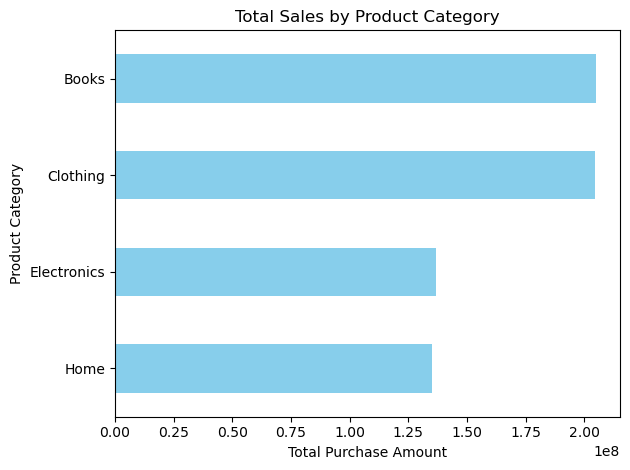

In [31]:
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values()
category_sales.plot(kind='barh', color='skyblue')
plt.title("Total Sales by Product Category")
plt.xlabel("Total Purchase Amount")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

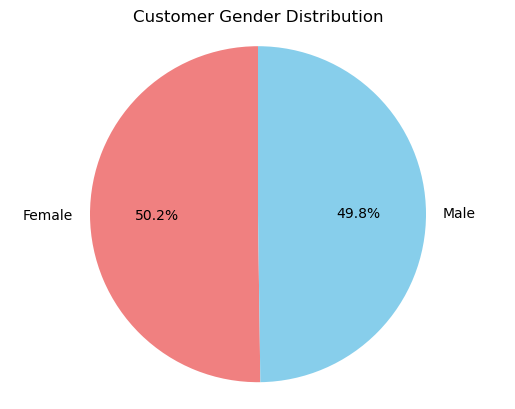

In [39]:
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
gender_counts = df['Gender'].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title("Customer Gender Distribution")
plt.axis('equal')
plt.show()


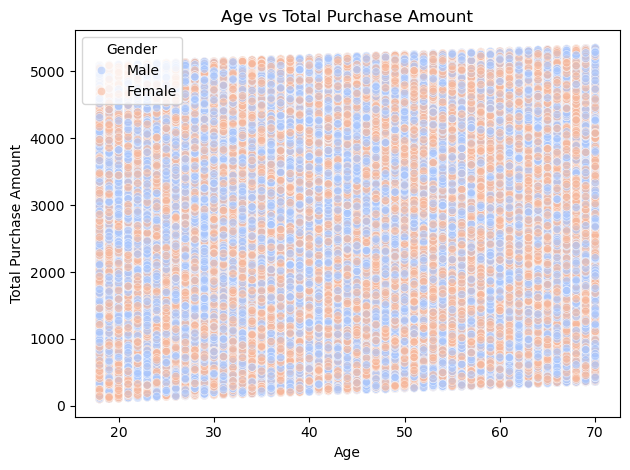

In [41]:
import seaborn as sns
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
sns.scatterplot(data=df, x='Age', y='Total Purchase Amount', hue='Gender', palette='coolwarm', alpha=0.6)
plt.title("Age vs Total Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Total Purchase Amount")
plt.tight_layout()
plt.show()


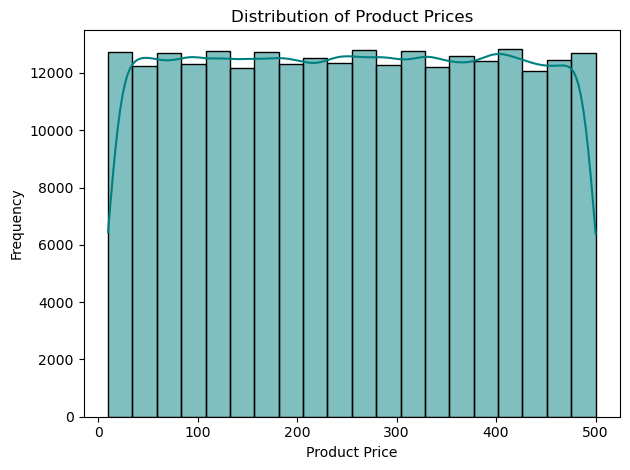

In [43]:
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
sns.histplot(df['Product Price'], bins=20, kde=True, color='teal')
plt.title("Distribution of Product Prices")
plt.xlabel("Product Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

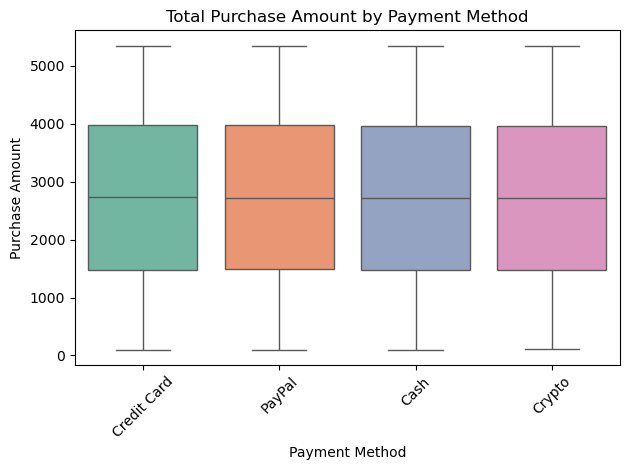

In [51]:
df = pd.read_csv(r"C:\Users\maadh\Downloads\rakeshpyhtonca2.csv")
sns.boxplot(data=df, x='Payment Method', y='Total Purchase Amount', palette='Set2', hue='Payment Method')
plt.title("Total Purchase Amount by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Purchase Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()